<a href="https://colab.research.google.com/github/gmargonato/ML_Projects/blob/main/world_cup_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ideias:

- Quantas vezes o time X chegou em cada estagio
- Media de gols em cada partida (expandir penaltis)
- Não acumular features / não gerar dependencia entre os atributos.
- Numero de gols em partidas de amistosos, em campeonatos


2022 FIFA's Soccer World Cup

Dataset: https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge

In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Datasets

In [3]:
# Load all datasets from folder

# Using glob to get all the csv files in the folder
path = "/content/drive/MyDrive/ML Projects/2022 World Cup/dataset"
csv_files = glob.glob(os.path.join(path, "*.csv")) 

# Dictionary with original datasets
d = {}

# Loop over the list of csv files
for file in csv_files:

    filename = (file.split("/")[-1]).split(".")[0]

    #Read the csv file
    d[filename] = pd.read_csv(file)

    #Print the file name and content
    print(filename)
    display(d[filename].tail())
    print()

world_cup_matches


,ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
895,896,2018,2018/7/7,Quarter-finals,Russia,2,2,Croatia,NaN,NaN,Croatia win on penalties (3 - 4),True
896,897,2018,2018/7/10,Semi-finals,France,1,0,Belgium,France,Belgium,NaN,False
897,898,2018,2018/7/11,Semi-finals,Croatia,2,1,England,Croatia,England,Extra time,False
898,899,2018,2018/7/14,Third place,Belgium,2,0,England,Belgium,England,NaN,False
899,900,2018,2018/7/15,Final,France,4,2,Croatia,France,Croatia,NaN,False



2022_world_cup_matches


,ID,Year,Date,Stage,Home Team,Away Team,Host Team
59,60,2022,2022/12/10,Quarter-finals,W55,W56,NaN
60,61,2022,2022/12/13,Semi-finals,W57,W58,NaN
61,62,2022,2022/12/14,Semi-finals,W59,W60,NaN
62,63,2022,2022/12/17,Third place,L61,L62,NaN
63,64,2022,2022/12/18,Final,W61,W62,NaN



world_cups


,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
17,2006,Germany,Italy,France,Germany,Portugal,147.0,32,64
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145.0,32,64
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171.0,32,64
20,2018,Russia,France,Croatia,Belgium,England,169.0,32,64
21,2022,Qatar,NaN,NaN,NaN,NaN,NaN,32,64



international_matches


,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium
17764,17765,Friendly,2022/9/27,Qatar,2,2,Chile,NaN,NaN,NaN,False
17765,17766,Friendly,2022/9/27,Saudi Arabia,0,0,United States,NaN,NaN,NaN,False
17766,17767,UEFA Nations League,2022/9/27,Portugal,0,1,Spain,Spain,Portugal,NaN,True
17767,17768,UEFA Nations League,2022/9/27,Switzerland,2,1,Czech Republic,Switzerland,Czech Republic,NaN,True
17768,17769,UEFA Nations League,2022/9/27,Norway,0,2,Serbia,Serbia,Norway,NaN,True



2022_world_cup_groups


,Group,Team,FIFA Ranking
27,G,Cameroon,43
28,H,Portugal,9
29,H,Ghana,61
30,H,Uruguay,14
31,H,South Korea,28



data_dictionary


,Table,Field,Description
33,international_matches,Home Goals,Goals scored by the home team
34,international_matches,Away Goals,Goals scored by the away team
35,international_matches,Away Team,Country playing as the away team
36,international_matches,Win Conditions,Was the match decided by penalties?
37,international_matches,Home Stadium,TRUE whenever the game took place in the home ...


Quick look at the data dictionary

In [4]:
d['data_dictionary']

,Table,Field,Description
0,world_cups,Year,Year in which the World Cup took place
1,world_cups,Host Country,Country that hosted the tournament
2,world_cups,Winner,Country that won the tournament
3,world_cups,Runners-Up,Country that received second place
4,world_cups,Third,Country that received third place
5,world_cups,Fourth,Country that received fourth place
6,world_cups,Goals Scored,Total number of goals scored in the tournament
7,world_cups,Qualified Teams,Total number of teams that participated in the...
8,world_cups,Matches Played,Total number of matches played in the tournament
9,2022_world_cup_groups,Group,Group for the first stage of the tournament (c...


# Data Exploration

## Analysis on **world_cups** Dataset

In [ ]:
df_world_cups = d['world_cups'].copy()
df_world_cups.tail()

In [ ]:
# Handling null values
df_world_cups.dropna(subset=['Winner'], inplace = True)

In [ ]:
# Number of times each country won the cup

plt.figure(figsize=(10,5))

sns.countplot(
    data = df_world_cups,
    x = 'Winner',
    order = df_world_cups.Winner.value_counts(ascending=True).index,
    palette = "GnBu_d"
)

plt.show()

In [ ]:
# Sum of goals scored per cup edition

plt.figure(figsize=(10,10))
sns.barplot(
    data = df_world_cups,
    x = 'Goals Scored', 
    y = df_world_cups.Year.astype(str)
)
plt.show()


From the chart above, we can see a growth trend in goals scored per cup, and by using the gradient, I will group the years in periods of 7 cups to analyze outliers.

In [ ]:
# Grouping up

df_world_cups2 = df_world_cups[['Year','Goals Scored']].copy()

df_world_cups2.insert(0,'Era','')
df_world_cups2['Era'] = np.where(
    df_world_cups2['Year'] <= 1962, 
    1, 
    np.where(
        (df_world_cups2['Year'] >= 1962) & (df_world_cups2['Year'] <= 1990), 
        2, 
        3
    )
)

In [ ]:
# Box-Plot analysis

df_world_cups2.groupby("Era").boxplot(column="Goals Scored", figsize=(8,8));

Surprisingly enough, the '54 and the '82 cups were **not** considered outliers inside their respective groups

In [ ]:
# Influence of playing home

df_world_cups3 = df_world_cups[['Host Country','Winner','Runners-Up','Third']].copy()

# Renaming columns
df_world_cups3.rename(
    columns={
        'Host Country': 'Host', 
        'Winner': 'First', 
        'Runners-Up' : 'Second'
    }, 
    inplace=True
)

# Check if final placement equals host
for col in ['First','Second','Third']:
    df_world_cups3[col] = np.where(df_world_cups3['Host'] == df_world_cups3[col], 1, 0)

# New row summarizing columns
df_world_cups3.append(df_world_cups3.sum(numeric_only=True).rename('Total')).tail(1)

Throughout 20 cups, the hosting country:
- went 10 times to the podium (50%)
- won first place 5 times (25%)

## Analysis on **2022_world_cup_groups** Dataset

In [ ]:
world_cup_groups = d['2022_world_cup_groups'].copy()
world_cup_groups.sort_values(by=['FIFA Ranking'], inplace = True)
world_cup_groups.tail()

In [ ]:
world_cup_groups.plot(
    kind = 'bar', 
    figsize=(15,7), 
    x='Team', 
    y='FIFA Ranking', 
    rot = 45,
    title = 'FIFA 2022 Ranking - Leftmost is Actually Higher Classification',
)

## Analysis on **world_cup_matches** Dataset

In [5]:
df_world_cup_matches = d['world_cup_matches'].copy()

df_world_cup_matches = df_world_cup_matches[
    ['Year','Stage','Home Team','Home Goals','Away Goals','Away Team','Winning Team','Win Conditions']
]

df_world_cup_matches.tail(5)

,Year,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Win Conditions
895,2018,Quarter-finals,Russia,2,2,Croatia,NaN,Croatia win on penalties (3 - 4)
896,2018,Semi-finals,France,1,0,Belgium,France,NaN
897,2018,Semi-finals,Croatia,2,1,England,Croatia,Extra time
898,2018,Third place,Belgium,2,0,England,Belgium,NaN
899,2018,Final,France,4,2,Croatia,France,NaN


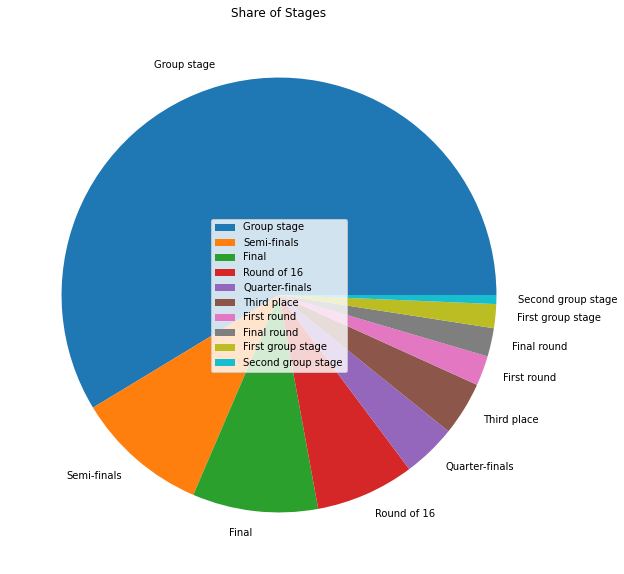

In [6]:
# Number of games played by stage

#df_world_cup_matches = df_world_cup_matches.loc[df_world_cup_matches['Year'] == 2018]
labels = df_world_cup_matches['Stage'].unique()
slices = df_world_cup_matches['Stage'].value_counts()

fig = plt.figure(figsize=(10, 10))
plt.pie(
    slices,
    labels = labels,
)
plt.title("Share of Stages")
plt.legend(labels,loc=10)
plt.show()

Year                0
Stage               0
Home Team           0
Home Goals          0
Away Goals          0
Away Team           0
Winning Team      199
Win Conditions    838
dtype: int64

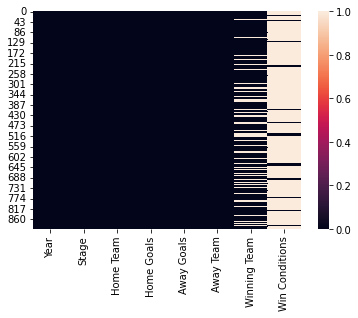

In [7]:
# Checking for missing values

sns.heatmap(df_world_cup_matches.isna())

pd.isnull(df_world_cup_matches).sum()

Handling missing values and penalties

In [8]:
# Auxiliar columns based on win conditions

df_world_cup_matches['aux1'] = df_world_cup_matches['Win Conditions'].str.split("win", expand=True)[0]
df_world_cup_matches['aux1'] = df_world_cup_matches['aux1'].str.replace(' ', '')

df_world_cup_matches['aux2'] = df_world_cup_matches['Win Conditions'].str.split("win", expand=True)[1]
df_world_cup_matches['aux2'] = df_world_cup_matches['aux2'].str.replace(' ', '')

In [9]:
# Missing Winning Team
df_world_cup_matches['Winning Team'] = np.where(
    df_world_cup_matches['Winning Team'].isnull(),
    (np.where(df_world_cup_matches['aux1'].isnull(), 'Draw',df_world_cup_matches['aux1'])),
    df_world_cup_matches['Winning Team']
)

# Remove leading and trailing whitespace
df_world_cup_matches['Winning Team'] = df_world_cup_matches['Winning Team'].str.strip()
df_world_cup_matches.tail()

,Year,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Win Conditions,aux1,aux2
895,2018,Quarter-finals,Russia,2,2,Croatia,Croatia,Croatia win on penalties (3 - 4),Croatia,onpenalties(3-4)
896,2018,Semi-finals,France,1,0,Belgium,France,NaN,NaN,NaN
897,2018,Semi-finals,Croatia,2,1,England,Croatia,Extra time,Extratime,None
898,2018,Third place,Belgium,2,0,England,Belgium,NaN,NaN,NaN
899,2018,Final,France,4,2,Croatia,France,NaN,NaN,NaN


In [10]:
# Creating new variables for Penalties

df_world_cup_matches['Won on Penalties'] = np.where(
    df_world_cup_matches['aux2'].str.contains("penalties", case=False, na=False), 1, 0
)

df_world_cup_matches['Home Penalties'] = np.where(
    df_world_cup_matches['Won on Penalties'] != 0, 
    df_world_cup_matches['aux2'].str.slice(12, 13), #if true 
    0 #if false
)
df_world_cup_matches['Home Penalties'] = df_world_cup_matches['Home Penalties'].apply(int)

df_world_cup_matches['Away Penalties'] = np.where(
    df_world_cup_matches['Won on Penalties'] != 0, 
    df_world_cup_matches['aux2'].str.slice(14, 15), #if true 
    0 #if false
)
df_world_cup_matches['Away Penalties'] = df_world_cup_matches['Away Penalties'].apply(int)

df_world_cup_matches.tail()

,Year,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Win Conditions,aux1,aux2,Won on Penalties,Home Penalties,Away Penalties
895,2018,Quarter-finals,Russia,2,2,Croatia,Croatia,Croatia win on penalties (3 - 4),Croatia,onpenalties(3-4),1,3,4
896,2018,Semi-finals,France,1,0,Belgium,France,NaN,NaN,NaN,0,0,0
897,2018,Semi-finals,Croatia,2,1,England,Croatia,Extra time,Extratime,None,0,0,0
898,2018,Third place,Belgium,2,0,England,Belgium,NaN,NaN,NaN,0,0,0
899,2018,Final,France,4,2,Croatia,France,NaN,NaN,NaN,0,0,0


In [ ]:
# Drop unnecessary columns
df_world_cup_matches.drop(columns=['Win Conditions','aux1','aux2'], inplace=True)

In [16]:
# Check data types
print(df_world_cup_matches.info(), "\n")

# Check Nulls
print(pd.isnull(df_world_cup_matches).sum(), "\n")

# Print
display(df_world_cup_matches.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              900 non-null    int64 
 1   Stage             900 non-null    object
 2   Home Team         900 non-null    object
 3   Home Goals        900 non-null    int64 
 4   Away Goals        900 non-null    int64 
 5   Away Team         900 non-null    object
 6   Winning Team      900 non-null    object
 7   Won on Penalties  900 non-null    int64 
 8   Home Penalties    900 non-null    int64 
 9   Away Penalties    900 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 70.4+ KB
None 

Year                0
Stage               0
Home Team           0
Home Goals          0
Away Goals          0
Away Team           0
Winning Team        0
Won on Penalties    0
Home Penalties      0
Away Penalties      0
dtype: int64 



,Year,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Won on Penalties,Home Penalties,Away Penalties
895,2018,Quarter-finals,Russia,2,2,Croatia,Croatia,1,3,4
896,2018,Semi-finals,France,1,0,Belgium,France,0,0,0
897,2018,Semi-finals,Croatia,2,1,England,Croatia,0,0,0
898,2018,Third place,Belgium,2,0,England,Belgium,0,0,0
899,2018,Final,France,4,2,Croatia,France,0,0,0


Data Verticalization

In [ ]:
# Home Team

df_world_cup_matches_aux_1 = df_world_cup_matches[
    ['Year','Stage','Home Team','Home Goals','Winning Team','Won on Penalties','Home Penalties']
].copy()

df_world_cup_matches_aux_1.rename(
    columns={'Home Team': 'Team', 'Home Goals': 'Goals', 'Winning Team':'Winner','Won on Penalties':'Extension','Home Penalties': 'Penalties'}, 
    inplace=True
)

df_world_cup_matches_aux_1['Winner'] = np.where(
    df_world_cup_matches_aux_1['Team'] == df_world_cup_matches_aux_1['Winner'], 1, 0
)

# Away Team

df_world_cup_matches_aux_2 = df_world_cup_matches[
    ['Year','Stage','Away Team','Away Goals','Winning Team','Won on Penalties','Away Penalties']
].copy()

df_world_cup_matches_aux_2.rename(
    columns={'Away Team': 'Team', 'Away Goals': 'Goals', 'Winning Team':'Winner','Won on Penalties':'Extension','Away Penalties': 'Penalties'}, 
    inplace=True
)

df_world_cup_matches_aux_2['Winner'] = np.where(
    df_world_cup_matches_aux_2['Team'] == df_world_cup_matches_aux_2['Winner'], 1, 0
)

# Append

goals_per_team = df_world_cup_matches_aux_1.append(df_world_cup_matches_aux_2, ignore_index=True)

#Clear memory
del df_world_cup_matches_aux_1
del df_world_cup_matches_aux_2

In [32]:
goals_per_team.tail(10)

,Year,Stage,Team,Goals,Winner,Extension,Penalties
1790,2018,Round of 16,Switzerland,0,0,0,0
1791,2018,Round of 16,England,1,1,1,4
1792,2018,Quarter-finals,France,2,1,0,0
1793,2018,Quarter-finals,Belgium,2,1,0,0
1794,2018,Quarter-finals,England,2,1,0,0
1795,2018,Quarter-finals,Croatia,2,1,1,4
1796,2018,Semi-finals,Belgium,0,0,0,0
1797,2018,Semi-finals,England,1,0,0,0
1798,2018,Third place,England,0,0,0,0
1799,2018,Final,Croatia,2,0,0,0


In [ ]:
# Summarize

#goals_per_team_sum = goals_per_team.groupby(['Year','Stage', 'Team']).agg(
#    Goals       = ('Goals', 'sum'), 
#    Penalties   = ('Penalties', 'sum')
#).reset_index() 

#goals_per_team_sum.tail(10)


In [27]:
# Now we are going to convert the stages into numbers, so we can plot a **scatterplot** with goals. This way we can understand the performance of each team throughout the Cup
goals_per_team['Stage'].unique()

array(['Group stage', 'Semi-finals', 'Final', 'Round of 16',
       'Quarter-finals', 'Third place', 'First round', 'Final round',
       'First group stage', 'Second group stage'], dtype=object)

In [40]:
# Dictionary with the 'translation' of each stage

stages_dict = {
    'First group stage'     : "0_First_Group_Stage", 
    'First round'           : "1_First_Round",
    'Second group stage'    : "2_Second_Group_Stage", 
    'Final round'           : "3_Final_Round",
    'Group stage'           : "4_Group_Stage", 
    'Round of 16'           : "5_Round_16",
    'Quarter-finals'        : "6_Quarter_Finals",    
    'Semi-finals'           : "7_Semi_Finals",   
    'Third place'           : "8_Third_Place",   
    'Final'                 : "9_Final",
}

df = goals_per_team.copy()
df.replace({'Stage': stages_dict}, inplace = True)
df.sort_values(by=['Year','Stage','Winner'], inplace = True)
df.tail(15)

,Year,Stage,Team,Goals,Winner,Extension,Penalties
0,1930,4_Group_Stage,France,4,1,0,0
1,1930,4_Group_Stage,United States,3,1,0,0
2,1930,4_Group_Stage,Yugoslavia,2,1,0,0
3,1930,4_Group_Stage,Romania,3,1,0,0
4,1930,4_Group_Stage,Argentina,1,1,0,0
...,...,...,...,...,...,...,...
1795,2018,6_Quarter_Finals,Croatia,2,1,1,4
1796,2018,7_Semi_Finals,Belgium,0,0,0,0
1797,2018,7_Semi_Finals,England,1,0,0,0
1798,2018,8_Third_Place,England,0,0,0,0


## Analysis on **international_matches** Dataset

In [ ]:
df_inter_matches = d['international_matches'].copy()
df_inter_matches

In [ ]:
# Checking for missing values

sns.heatmap(df_inter_matches.isna())

pd.isnull(df_inter_matches).sum()

In [ ]:
# Extracting the year when the match happened
new_col = df_inter_matches['Date'].str.slice(0, 4)
df_inter_matches.insert(loc=0, column='Year', value=new_col)

# Rename columns
df_inter_matches.rename(
    columns={
        'Tournament': 'Stage',
    }, 
    inplace=True
)

# Drop columns
df_inter_matches.drop(columns=['ID','Date','Losing Team','Home Stadium'], inplace = True)

df_inter_matches.tail()

In [ ]:
df_inter_matches['Win Conditions'].unique()

# Data Modeling

### Regression vs Classification
Apart from some overlaps between the two types of machine learning algorithms, the most significant difference between the two is that while **regression** helps predict a **continuous quantity**, while **classification** predicts **discrete class labels**. 

<br>
<div>
<img src="https://lh4.googleusercontent.com/K17BRCQTR5hHU-qOthrs9KIQa4DLAWJh5jeXkyn6NZRQfimHnCAadWbw3EaZPZl1bit2IBQPeBv1CZURiyFYkIDPH1Z3Pb0O_qkeS9av7vrEtQLpMLWdtDJ7YNlRki8CoAsY8bmn" width="500"/>
</div>
<br>

Applying the concepts above on this project, the question we want to solve is:

> **Who is gonna win the next (2022) world cup / Which team does have a higher chance of winning?**

A **regression** algorithm in this case can be useful to predict which team will win the 2022 world cup based on their performance on previous games/cups, and due to fact that probability of winning chance is a continuous quantity between 0 and 1.


## Building the final table that will be used in the **Regression** Model

In [ ]:
df_world_cup_matches_aux_1 = df_world_cup_matches[['Year','Stage','Home Team','Home Goals', 'Winning Team']].copy()
df_world_cup_matches_aux_1.rename(columns={'Year':'Cup','Home Team': 'Team', 'Home Goals': 'Goals', 'Winning Team':'Winner'}, inplace=True)

df_world_cup_matches_aux_2 = df_world_cup_matches[['Year','Stage','Away Team','Away Goals', 'Winning Team']].copy()
df_world_cup_matches_aux_2.rename(columns={'Year':'Cup','Away Team': 'Team', 'Away Goals': 'Goals','Winning Team':'Winner'}, inplace=True)

df_matches = df_world_cup_matches_aux_1.append(df_world_cup_matches_aux_2, ignore_index=True)

#Clear memory
del df_world_cup_matches_aux_1
del df_world_cup_matches_aux_2

df_matches['Won'] = np.where(df_matches['Team'].str.strip() == df_matches['Winner'].str.strip(), 1, 0) 

display(df_matches.tail())